In [58]:
%matplotlib inline

In [59]:
# Dependencies
import matplotlib as mpl  
import matplotlib.pyplot as plt  
import pandas as pd 
import numpy as np 
import scipy.stats as sts 
import matplotlib as mpl 

In [60]:
# Load the files
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [61]:
# Load the city data into a Dataframe
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(5)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [62]:
# Load the ride data into a Dataframe
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.tail(5)

,city,date,fare,ride_id
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277
2374,Newtonview,2019-04-25 10:20:13,55.84,9990581345298


In [63]:
## List data points for each type of city
city_types = city_data_df["type"].unique() 
city_types=np.sort(city_types)  
city_types


array(['Rural', 'Suburban', 'Urban'], dtype=object)

In [64]:
# Merge the DataFrames

pyber_data_df=pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [65]:
##Create DataFrames for each city type.
#Create Urban cities DF
urban_cities_df=pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [66]:
## Create subarban DFs
suburban_cities_df=pyber_data_df[pyber_data_df["type"]=="Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [67]:
## Create rural DFs
rural_cities_df=pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [68]:
##Total Rides: Rides Per City
#Urban Rides Per City
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count = urban_ride_count.sum()
urban_ride_count

1625

In [69]:
## Suburban Rides Per City
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count=suburban_ride_count.sum()
suburban_ride_count

625

In [70]:
## Rural Rides Per City
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count=rural_ride_count.sum()
rural_ride_count

125

In [71]:
##Total Drivers: Actually calculated as Average Drivers Per City 
#Urban Drivers Per City
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count=urban_driver_count.sum()
urban_driver_count

2405.0

In [72]:
## Suburban Drivers Per City
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_driver_count.sum()
suburban_driver_count

490.0

In [73]:
## Rural Drivers per City
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count=rural_driver_count.sum()
rural_driver_count

78.0

In [74]:
##Total Fares Per City
#Urban Tatal Fares
urban_tot_fare = urban_cities_df.groupby(["city"]).sum()["fare"]
urban_tot_fare=urban_tot_fare.sum()
urban_tot_fare

39854.38000000001

In [75]:
## Suburban Tatal Fares
suburban_tot_fare = suburban_cities_df.groupby(["city"]).sum()["fare"]
suburban_tot_fare=suburban_tot_fare.sum()
suburban_tot_fare

19356.33

In [76]:
## Rural Tatal Fares
rural_tot_fare = rural_cities_df.groupby(["city"]).sum()["fare"]
rural_tot_fare=rural_tot_fare.sum()
rural_tot_fare

4327.93

In [77]:
##Average Fare per Ride Calculation
#Urban Average Fare per Ride
urban_avg_fare_per_ride = urban_tot_fare / urban_ride_count #* 100
urban_avg_fare_per_ride

24.525772307692314

In [78]:
# Suburban Average Fare per Ride
suburban_avg_fare_per_ride = suburban_tot_fare / suburban_ride_count #* 100
suburban_avg_fare_per_ride

30.970128000000003

In [79]:
# Rural Average Fare per Ride
rural_avg_fare_per_ride = rural_tot_fare / rural_ride_count #* 100
rural_avg_fare_per_ride

34.62344

In [80]:
##Average Fare per Driver
#Urban Average Fare per Driver
urban_avg_fare_per_driver = urban_tot_fare/ urban_driver_count#* 100
urban_avg_fare_per_driver

16.57146777546778

In [81]:
## Suburban Average Fare per Driver
suburban_avg_fare_per_driver = suburban_tot_fare/ suburban_driver_count 
suburban_avg_fare_per_driver

39.50271428571429

In [82]:
## rural Average Fare per Driver
rural_avg_fare_per_driver = rural_tot_fare/ rural_driver_count 
rural_avg_fare_per_driver

55.48628205128205

In [83]:
## data review
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [84]:
# check the data types
pyber_data_df.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [85]:
## First series for DF  is Total Rides

total_rides_by_type = (rural_ride_count, suburban_ride_count,urban_ride_count)
total_rides_by_type

(125, 625, 1625)

In [86]:
# Second series for DF is Total Drivers

total_drivers_by_type =(rural_driver_count, suburban_driver_count, urban_driver_count)
total_drivers_by_type

(78.0, 490.0, 2405.0)

In [87]:
## Third series for DF is Total Fares

total_fares =(rural_tot_fare, suburban_tot_fare, urban_tot_fare)
total_fares

(4327.93, 19356.33, 39854.38000000001)

In [88]:
## Fourth series Average Fare Per Ride

avg_fare_per_ride = (rural_avg_fare_per_ride, suburban_avg_fare_per_ride, urban_avg_fare_per_ride)
avg_fare_per_ride

(34.62344, 30.970128000000003, 24.525772307692314)

In [89]:
## Fith series Average Fare Per Driver

avg_fare_per_driver = (rural_avg_fare_per_driver, suburban_avg_fare_per_driver, urban_avg_fare_per_driver)
avg_fare_per_driver

(55.48628205128205, 39.50271428571429, 16.57146777546778)

In [90]:
# Summary

pyber_summary_data_df=pd.DataFrame({
    "City Types" : city_types,
    "Total Rides" : total_rides_by_type,
    "Total Drivers":total_drivers_by_type,
    "Total Fares": total_fares,
    "Average Fare per Ride":avg_fare_per_ride,
    "Average Fare per Driver": avg_fare_per_driver})
pyber_summary_data_df

,City Types,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
0,Rural,125,78.0,4327.93,34.623440,55.486282
1,Suburban,625,490.0,19356.33,30.970128,39.502714
2,Urban,1625,2405.0,39854.38,24.525772,16.571468


In [91]:
## Change the index to City Types
pyber_summary_data_df.set_index("City Types", inplace = True)
pyber_summary_data_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
City Types,,,,,
Rural,125,78.0,4327.93,34.623440,55.486282
Suburban,625,490.0,19356.33,30.970128,39.502714
Urban,1625,2405.0,39854.38,24.525772,16.571468


In [92]:
#total_drivers_by_type
pyber_summary_data_df["Total Drivers"]= pyber_summary_data_df["Total Drivers"].map("{:.0f}".format)
pyber_summary_data_df["Total Fares"]= pyber_summary_data_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_data_df["Average Fare per Ride"]= pyber_summary_data_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_data_df["Average Fare per Driver"]= pyber_summary_data_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_data_df.index.name = None
pyber_summary_data_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [93]:
#### PART II

In [94]:
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [95]:
## Rename columns  
pyber_data_df.rename(columns={'city': 'City',
                     'date':'Date',
                     'fare':'Fare', 
                     'ride_id': 'Ride Id',
                     'driver_count': 'No. Drivers', 
                     'type':'City Type'}, inplace=True)
pyber_data_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [96]:
##Set index to Date
pyber_data_df.set_index("Date", inplace = True)
pyber_data_df.head()

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban


In [97]:
## 3 Create new DF for fare data, include Date, City Type, Fare
pyber_data_fares_df = pyber_data_df[["Fare", "City Type"]].copy()
pyber_data_fares_df

,Fare,City Type
Date,,
2019-01-14 10:14:22,13.83,Urban
2019-03-04 18:24:09,30.24,Urban
2019-02-24 04:29:00,33.44,Urban
2019-02-10 23:22:03,23.44,Urban
2019-03-06 04:28:35,34.58,Urban
...,...,...
2019-04-29 17:04:39,13.38,Rural
2019-01-30 00:05:47,20.76,Rural
2019-02-10 21:03:50,11.11,Rural


In [98]:
## Set the index to date time data type. 
pyber_data_fares_df.index = pd.to_datetime(pyber_data_fares_df.index)

In [99]:
##Validate date time for the index
pyber_data_fares_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fare       2375 non-null   float64
 1   City Type  2375 non-null   object 
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [100]:
pyber_data_fares_df.head()

,Fare,City Type
Date,,
2019-01-14 10:14:22,13.83,Urban
2019-03-04 18:24:09,30.24,Urban
2019-02-24 04:29:00,33.44,Urban
2019-02-10 23:22:03,23.44,Urban
2019-03-06 04:28:35,34.58,Urban


In [101]:
##Calculate the sum() of fares by the type of city using groupby() to create a Series.
sum_fares_by_type = pyber_data_fares_df.groupby(["City Type"]).sum()["Fare"]
sum_fares_by_type

City Type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: Fare, dtype: float64

In [102]:
##Calculate the sum() of fares by date using groupby() to create a Series.
sum_fares_by_date = pyber_data_fares_df.groupby(["Date"]).sum()["Fare"]
sum_fares_by_date.head()

Date
2019-01-01 00:08:16    37.91
2019-01-01 00:46:46    47.74
2019-01-01 02:07:24    24.07
2019-01-01 03:46:50     7.57
2019-01-01 05:23:21    10.75
Name: Fare, dtype: float64

In [103]:
#Convert the series into a dataframes.  ## not sure I need to do this but..
sum_fares_by_type_df=pd.DataFrame({"Sum_of_Fares_by_Type" : sum_fares_by_type})
sum_fares_by_date_df=pd.DataFrame({"Sum_of_Fares_by_Date" : sum_fares_by_date})

In [104]:
sum_fares_by_date_df.head()

,Sum_of_Fares_by_Date
Date,
2019-01-01 00:08:16,37.91
2019-01-01 00:46:46,47.74
2019-01-01 02:07:24,24.07
2019-01-01 03:46:50,7.57
2019-01-01 05:23:21,10.75


In [105]:
pyber_data_fares_df = pyber_data_fares_df.reset_index()

In [106]:
#sum_fares_by_type_df
sum_fares_by_date_df.head()

,Sum_of_Fares_by_Date
Date,
2019-01-01 00:08:16,37.91
2019-01-01 00:46:46,47.74
2019-01-01 02:07:24,24.07
2019-01-01 03:46:50,7.57
2019-01-01 05:23:21,10.75


In [107]:
## Create pivot table Datafrme. 
pd.pivot_table(pyber_data_fares_df, 
                   values="Fare", 
                   index="Date",
                   columns="City Type")

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [108]:
## 11 Create a Dataframe from pivot data frame. 

pyber_data_fares_df_sub= pd.pivot_table(pyber_data_fares_df, 
                    values="Fare", 
                    index="Date",
                    columns="City Type")
pyber_data_fares_df_sub.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [109]:
pyber_data_fares_df_sub = pyber_data_fares_df_sub.reset_index()
pyber_data_fares_df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2375 non-null   datetime64[ns]
 1   Rural     125 non-null    float64       
 2   Suburban  625 non-null    float64       
 3   Urban     1625 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 74.3 KB


In [110]:
#filter by dates 

datemask = (pyber_data_fares_df_sub['Date'] > "2019-01-01") & (pyber_data_fares_df_sub['Date'] <="2019-04-28")

pyber_sandbox_df=pd.DataFrame(pyber_data_fares_df_sub.loc[datemask])

pyber_sandbox_df.head()

City Type,Date,Rural,Suburban,Urban
0,2019-01-01 00:08:16,NaN,NaN,37.91
1,2019-01-01 00:46:46,NaN,47.74,NaN
2,2019-01-01 02:07:24,NaN,24.07,NaN
3,2019-01-01 03:46:50,NaN,NaN,7.57
4,2019-01-01 05:23:21,NaN,NaN,10.75


In [111]:
#Reset index and review
pyber_sandbox_df.set_index("Date", inplace = True)
#pyber_sandbox_df.info()
pyber_sandbox_df.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [112]:
#Using new dataframe using resample
pyber_fare_fin_df =pyber_sandbox_df.resample('W').sum()

pyber_fare_fin_df.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


In [113]:
## DF review structure
pyber_fare_fin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17 entries, 2019-01-06 to 2019-04-28
Freq: W-SUN
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     17 non-null     float64
 1   Suburban  17 non-null     float64
 2   Urban     17 non-null     float64
dtypes: float64(3)
memory usage: 544.0 bytes


In [114]:
### annotated chart
#working with axis
x_axis = pyber_fare_fin_df.index
print(x_axis)

DatetimeIndex(['2019-01-06', '2019-01-13', '2019-01-20', '2019-01-27',
               '2019-02-03', '2019-02-10', '2019-02-17', '2019-02-24',
               '2019-03-03', '2019-03-10', '2019-03-17', '2019-03-24',
               '2019-03-31', '2019-04-07', '2019-04-14', '2019-04-21',
               '2019-04-28'],
              dtype='datetime64[ns]', name='Date', freq='W-SUN')


In [115]:
urban_y_axis = pyber_fare_fin_df["Urban"]
urban_y_axis.head()

Date
2019-01-06    1661.68
2019-01-13    2050.43
2019-01-20    1939.02
2019-01-27    2129.51
2019-02-03    2086.94
Freq: W-SUN, Name: Urban, dtype: float64

In [116]:
suburban_y_axis = pyber_fare_fin_df["Suburban"]
suburban_y_axis.head()

Date
2019-01-06     721.60
2019-01-13    1105.13
2019-01-20    1218.20
2019-01-27    1203.28
2019-02-03    1042.79
Freq: W-SUN, Name: Suburban, dtype: float64

In [117]:
rural_y_axis = pyber_fare_fin_df["Rural"]
rural_y_axis.head()

Date
2019-01-06    187.92
2019-01-13     67.65
2019-01-20    306.00
2019-01-27    179.69
2019-02-03    333.08
Freq: W-SUN, Name: Rural, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

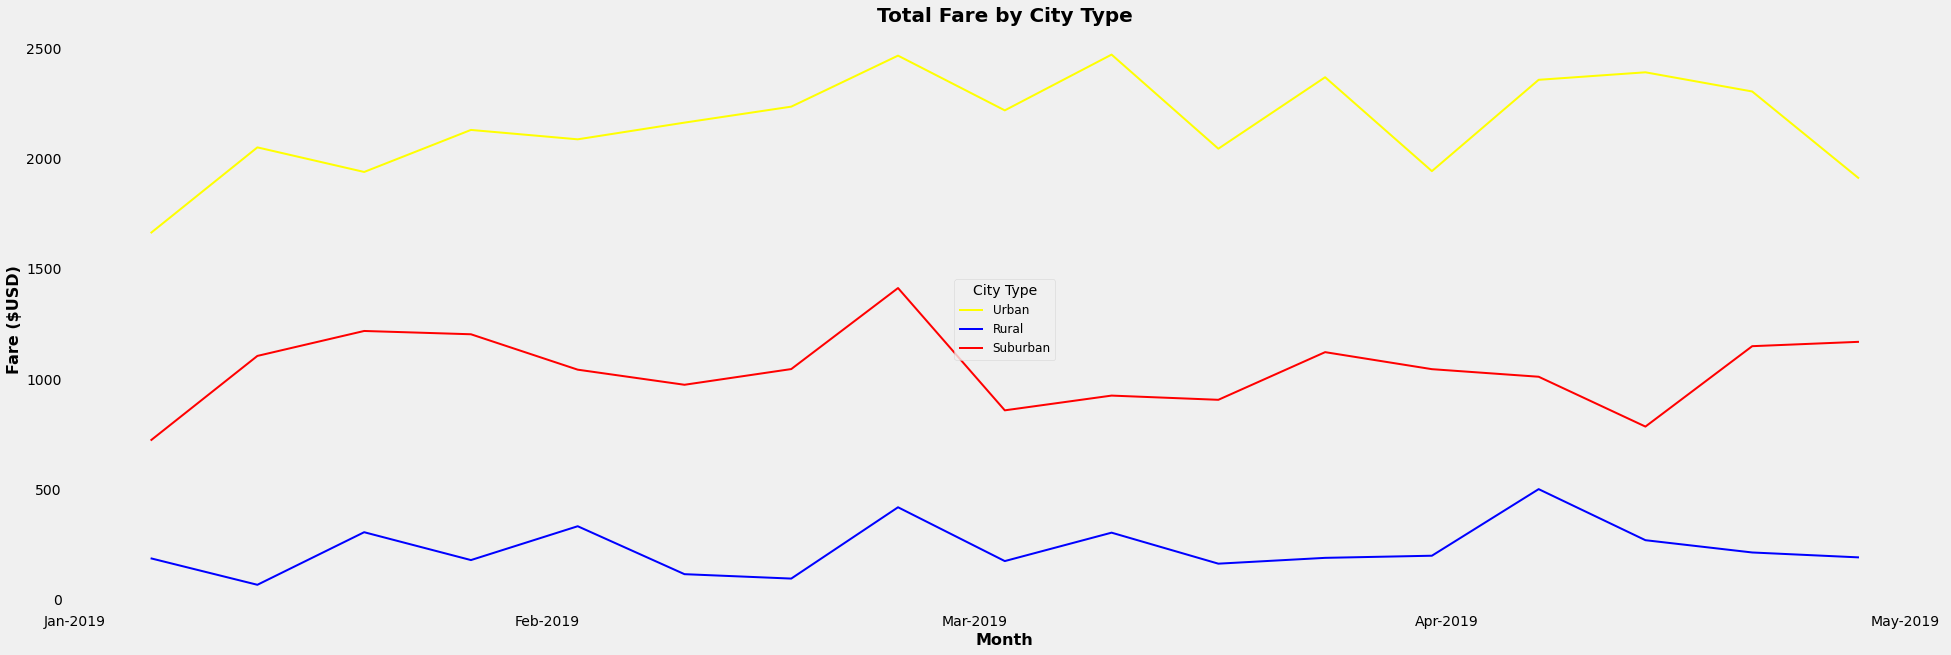

In [118]:
#plotting
plt.style.use('fivethirtyeight') 

fig, ax = plt.subplots(figsize=(30, 10)) 

## Build the plot
ax.plot(x_axis, urban_y_axis, color="yellow", linewidth=2, label="Urban")  # plots urban fares
ax.plot(x_axis, rural_y_axis, color="blue", linewidth=2, label="Rural")  # plots rural fare
ax.plot(x_axis, suburban_y_axis, color="red", linewidth=2, label="Suburban") # plots suburban fares

##Set a title
ax.set_title("Total Fare by City Type", fontsize=20, weight="bold")

## Label the axes
ax.set_xlabel("Month", fontsize=16, weight='bold')
ax.set_ylabel("Fare ($USD)", fontsize=16, weight='bold')

## set x axis ticks to months 
import matplotlib.dates as mdates  
months = mdates.MonthLocator()  
ax.xaxis.set_major_locator(months) 

## format x axis
month_format = mdates.DateFormatter("%b-%Y")  
ax.xaxis.set_major_formatter(month_format)

## Legend parameters
lgnd = plt.legend(fontsize="12"
             , scatterpoints=1 
             , loc="center"  
             , title="City Type") 
lgnd.legendHandles[0]._sizes = [100] 
lgnd.legendHandles[1]._sizes = [100] 
lgnd.legendHandles[2]._sizes = [100] 
lgnd.get_title().set_fontsize(14) 
lgnd.get_title().set_weight="bold" 


ax.grid(linewidth=2) 


plt.savefig("analysis\Total_Fare_by_City_Type_Pyber_Challenge_Module_5.png")


plt.show